In [28]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("AB_NYC_2019.csv")

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='price', ylabel='Count'>

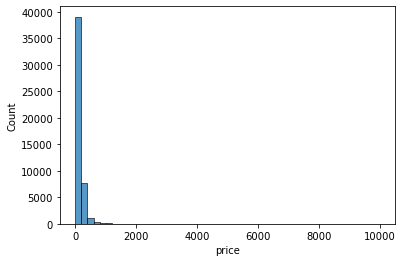

In [13]:
sns.histplot(df.price, bins=50)

In [19]:
df = df[['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]

### Question 1

In [20]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Question 2

In [22]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [26]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [30]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [31]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]] 
df_test = df.iloc[idx[n_train+n_val:]]

In [32]:
len(df_train),len(df_val),len(df_test)

(29337, 9779, 9779)

In [33]:
df_train

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30
...,...,...,...,...,...,...,...,...
14975,40.71178,-73.95779,95,2,0,NaN,1,0
14661,40.78638,-73.97004,101,30,10,0.40,1,0
24515,40.72716,-73.98524,100,3,75,3.12,1,60
31460,40.79578,-73.94523,68,2,31,2.10,1,265


In [34]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [35]:
del df_train['price']
del df_val['price']
del df_test['price']

In [36]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [37]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


In [49]:
df_train.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,3,62,0.71,1,189
44383,40.70666,-73.90779,21,0,NaN,1,73
15394,40.76116,-73.99016,2,17,0.43,1,0
43230,40.70763,-74.01050,2,5,1.88,327,272
16332,40.79658,-73.93287,2,30,0.80,1,30


### Question 3

In [72]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [73]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [74]:
def prepare_X_fill_zero(df):
    df = df.fillna(0)
    X = df.values
    return X

In [75]:
def prepare_X_fill_mean(df, mean):
    df = df.fillna(mean)
    X = df.values
    return X

In [78]:
X_train = prepare_X_fill_zero(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X_fill_zero(df_val)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred), 2)

0.64

In [79]:
mean_train = df_train['reviews_per_month'].mean()
X_train = prepare_X_fill_mean(df_train, mean_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X_fill_mean(df_val, mean_train)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred), 2)

0.64

### Question 4

In [80]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [81]:
X_train = prepare_X_fill_zero(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X_fill_zero(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.6557528427434279

In [82]:
answer = {}
for i in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X_fill_zero(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=i)
    X_val = prepare_X_fill_zero(df_val)
    y_pred = w0 + X_val.dot(w)
    answer[i] = rmse(y_val, y_pred)

In [84]:
answer

{0: 0.6430337788649609,
 1e-06: 0.6430341157340052,
 0.0001: 0.6430723153643709,
 0.001: 0.6437669735254038,
 0.01: 0.6557528427434279,
 0.1: 0.6773299642450078,
 1: 0.6823116950157346,
 5: 0.6827915727845701,
 10: 0.6828430212099271}

### Question 5

In [85]:
answer_seed = {}
def splitting_data(random_seed):
    idx = np.arange(n)
    np.random.seed(random_seed)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]] 
    df_test = df.iloc[idx[n_train+n_val:]]
    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)
    del df_train['price']
    del df_val['price']
    del df_test['price']
    X_train = prepare_X_fill_zero(df_train)
    w0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X_fill_zero(df_val)
    y_pred = w0 + X_val.dot(w)
    answer_seed[random_seed] = rmse(y_val, y_pred)

In [86]:
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    splitting_data(i)

In [91]:
std = np.std(list(answer_seed.values()))

In [93]:
std

0.007932965962252883

In [94]:
(round(std, 3))

0.008

### Question 6

In [95]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
y_train = np.log1p(df_train.price.values)
y_test = np.log1p(df_test.price.values)
del df_train['price']
del df_test['price']

In [96]:
len(df_train), len(df_test)

(39116, 9779)

In [97]:
X_train = prepare_X_fill_zero(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

X_test = prepare_X_fill_zero(df_test)
y_pred = w0 + X_test.dot(w)
rmse(y_test, y_pred)

0.6452771348591311